In [47]:
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize


 
# Define a function to get info from the FPL API and save to the specified file_path
# It might be a good idea to navigate to the link in a browser to get an idea of what the data looks like
def get_json(file_path):
    r = requests.get('https://fantasy.premierleague.com/drf/bootstrap')
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile:
        json.dump(jsonResponse, outfile)
 
# Run the function and choose where to save the json file
get_json(r'C:\Users\lucama_eater\Downloads\FantasyFootball\fpl.json')
 
# Open the json file and print a list of the keys
with open(r'C:\Users\lucama_eater\Downloads\FantasyFootball\fpl.json') as json_data:
    d = json.load(json_data)
    print(list(d.keys()))

# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html
df = json_normalize(d['elements'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

['elements', 'total-players', 'player', 'element_types', 'watched', 'next-event', 'phases', 'stats', 'game-settings', 'current-event', 'teams', 'stats_options', 'last-entry-event', 'entry', 'next_event_fixtures', 'events']
Columns:
 ['assists', 'bonus', 'bps', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id', 'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in', 'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals', 'penalties_missed', 'penalties_saved', 'photo', 'points_per_game', 'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points', 'transfers_in', 'transfers_in_eve

In [17]:
df = json_normalize(d['teams'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Columns:
 ['code', 'current_event_fixture', 'draw', 'id', 'link_url', 'loss', 'name', 'next_event_fixture', 'played', 'points', 'position', 'short_name', 'strength', 'strength_attack_away', 'strength_attack_home', 'strength_defence_away', 'strength_defence_home', 'strength_overall_away', 'strength_overall_home', 'team_division', 'unavailable', 'win'] 

Dataframe Head:
    code                              current_event_fixture  draw  id link_url  \
0     3  [{'is_home': True, 'day': 19, 'event_day': 1, ...     0   1            
1    91  [{'is_home': True, 'day': 19, 'event_day': 1, ...     0   2            
2    36  [{'is_home': False, 'day': 19, 'event_day': 1,...     0   3            
3    90  [{'is_home': False, 'day': 19, 'event_day': 1,...     0   4            
4    97  [{'is_home': False, 'day': 19, 'event_day': 1,...     0   5            

   loss         name                                 next_event_fixture  \
0     0      Arsenal  [{'is_home': True, 'day': 29, 'event_day': 1

In [18]:

# The (not so) secret sauce (see https://www.premierleague.com/news/106533)
df = json_normalize(d['game-settings'])
print('Columns:\n', list(df), '\n')

Columns:
 ['element_type.1.bps_clean_sheets', 'element_type.1.bps_goals_scored', 'element_type.1.scoring_clean_sheets', 'element_type.1.scoring_goals_conceded', 'element_type.1.scoring_goals_scored', 'element_type.1.squad_max_play', 'element_type.1.squad_min_play', 'element_type.1.squad_select', 'element_type.1.sub_positions_locked', 'element_type.1.ui_shirt_specific', 'element_type.2.bps_clean_sheets', 'element_type.2.bps_goals_scored', 'element_type.2.scoring_clean_sheets', 'element_type.2.scoring_goals_conceded', 'element_type.2.scoring_goals_scored', 'element_type.2.squad_max_play', 'element_type.2.squad_min_play', 'element_type.2.squad_select', 'element_type.3.bps_clean_sheets', 'element_type.3.bps_goals_scored', 'element_type.3.scoring_clean_sheets', 'element_type.3.scoring_goals_conceded', 'element_type.3.scoring_goals_scored', 'element_type.3.squad_max_play', 'element_type.3.squad_min_play', 'element_type.3.squad_select', 'element_type.4.bps_clean_sheets', 'element_type.4.bps_g

In [49]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/leagues-classic-standings/231600').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['standings'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head(100))



Keys:
 ['new_entries', 'league', 'standings', 'update_status'] 

Columns:
 ['has_next', 'number', 'results'] 

Dataframe Head:
    has_next  number                                            results
0     False       1  [{'id': 5239110, 'entry_name': '99 Fred Balloo...


In [39]:
# See json_normalize documentation for further info
df = json_normalize(d['standings'], 'results')
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head(100))

Columns:
 ['entry', 'entry_name', 'event_total', 'id', 'last_rank', 'league', 'movement', 'own_entry', 'player_name', 'rank', 'rank_sort', 'start_event', 'stop_event', 'total'] 

Dataframe Head:
       entry            entry_name  event_total        id  last_rank  league  \
0    447289      99 Fred Balloons            0   5239110          1  231600   
1   1309202     Relegation Rovers            0   6735399          2  231600   
2   2766779  Good Klopp Bad Klopp            0  15284960          3  231600   
3   2275981    Game on the Throne            0  12591971          4  231600   
4   2305266       Que Salah Salah            0  12483392          5  231600   
5    159282      Tequila Magic Fc            0   5239108          6  231600   
6    109718                 PEA14            0   5239107          7  231600   
7   1312341        Bobby Firminho            0   6751222          8  231600   
8    468015            Dream Team            0   5239112          9  231600   
9   1680664   

In [28]:
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['history'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head(100))

Keys:
 ['chips', 'entry', 'leagues', 'season', 'history'] 

Columns:
 ['bank', 'entry', 'event', 'event_transfers', 'event_transfers_cost', 'id', 'movement', 'overall_rank', 'points', 'points_on_bench', 'rank', 'rank_sort', 'total_points', 'value'] 

Dataframe Head:
     bank   entry  event  event_transfers  event_transfers_cost         id  \
0      5  447289      1                0                     0     447289   
1      5  447289      2                0                     0    5003601   
2     18  447289      3                3                     4   10112815   
3     18  447289      4                1                     0   15486685   
4      0  447289      5                0                     0   20991625   
5     22  447289      6                1                     0   26627635   
6      1  447289      7                2                     4   32263645   
7      1  447289      8                0                     0   37965190   
8      0  447289      9                

In [40]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/447289/event/1/picks').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['picks'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head(100))


      

Keys:
 ['active_chip', 'automatic_subs', 'entry_history', 'event', 'picks'] 

Columns:
 ['element', 'is_captain', 'is_vice_captain', 'multiplier', 'position'] 

Dataframe Head:
     element  is_captain  is_vice_captain  multiplier  position
0        47       False            False           1         1
1       247       False            False           1         2
2        72       False            False           1         3
3       423       False            False           1         4
4       276       False            False           1         5
5       393       False            False           1         6
6       253        True            False           2         7
7       223       False            False           1         8
8       257       False             True           1         9
9        45       False            False           1        10
10      280       False            False           1        11
11      439       False            False           1        12
12 

<Figure size 1440x864 with 0 Axes>

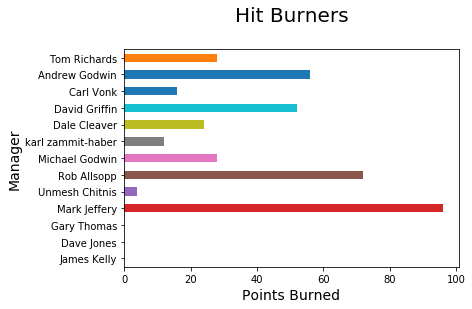

<Figure size 864x576 with 0 Axes>

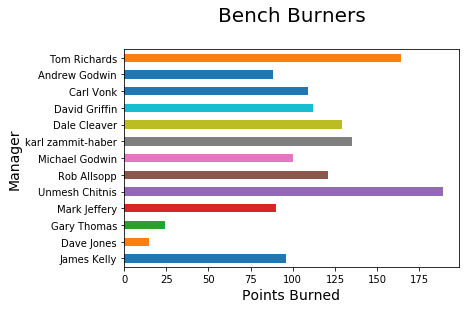

<Figure size 864x576 with 0 Axes>

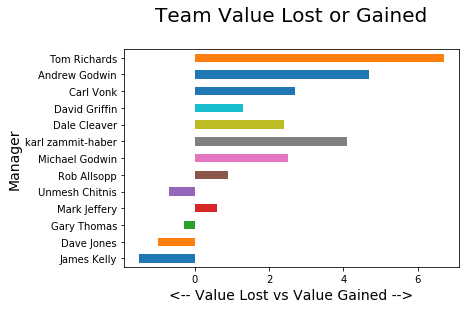

In [29]:
# Get the league, loop through the players, and call the history for each
# Then, loop through that and sum up the transfers :) 

# Need all this stuff
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

point_burners=[]
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/leagues-classic-standings/231600').text)
df = json_normalize(d['standings'], 'results')
for index,row in (df.iterrows()):
    transfer_cost=0
    points_left_on_the_bench=0
    value=0
    d = json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/' + str(row['entry']) + '/history').text)
    df1 = json_normalize(d['history'])
    for index,nrow in (df1.iterrows()):
        transfer_cost = nrow['event_transfers_cost'] + transfer_cost
        points_left_on_the_bench = nrow['points_on_bench'] + points_left_on_the_bench
    value = ((nrow['value'] - 1000) / 10)
    point_burners.append({'Owner': row['player_name'], 'Points Burned': transfer_cost, \
                          'Points Left On The Bench': points_left_on_the_bench, \
                          'Rank': row['rank'], 'Value': value})

dfpb=pd.DataFrame(point_burners)
dfpb_sorted=dfpb.sort_values(by='Rank',ascending=False)
plt.figure(figsize=(20, 12))
fig=dfpb_sorted.plot(kind='barh',x='Owner', y='Points Burned',legend=False)
fig.set_title('Hit Burners\n',fontsize=20)
fig.set_ylabel('Manager',fontsize=14)
fig.set_xlabel('Points Burned',fontsize=14)

x=plt.figure(figsize=(12, 8))
x=fig=dfpb_sorted.plot(kind='barh',x='Owner', y='Points Left On The Bench',legend=False)
x=fig.set_title('Bench Burners\n',fontsize=20)
x=fig.set_ylabel('Manager',fontsize=14)
x=fig.set_xlabel('Points Burned',fontsize=14)

x=plt.figure(figsize=(12, 8))
x=fig=dfpb_sorted.plot(kind='barh',x='Owner', y='Value',legend=False)
x=fig.set_title('Team Value Lost or Gained\n',fontsize=20)
x=fig.set_ylabel('Manager',fontsize=14)
x=fig.set_xlabel('<-- Value Lost vs Value Gained -->',fontsize=14)



In [38]:
# Get the league, loop through the players, and call the history for each
# Then, loop through that and sum up the transfers :) 

# Need all this stuff
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

players=[]
# Find the latest gameweek in a really nasty way
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/leagues-classic-standings/231600').text)
df = json_normalize(d['standings'], 'results')
for index,row in (df.iterrows()):
    d = json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/' + str(row['entry']) + '/history').text)
    df1 = json_normalize(d['history'])
    for index,nrow in (df1.iterrows()):
        pass;
game_week=nrow['event']
print (game_week)





23
x


In [ ]:

Captain points
Most popular players
Most popular teams
